In [1]:
# Get the critical imports out of the way
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb


C:\ProgramData\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#getting data
dftrain=pd.read_csv("train.csv")
dftest=pd.read_csv("test.csv")
dftrain.head(5)

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,25355,startup_4,Iaşi (Romania),"Dec 9, 2018",Current Employee,SDE1,SDE overview,Great impact. Professional people. Chance to s...,You should be on-call according to a team rota...,None.,3.0,5.0,4.0,5.0,4.0,0,3.0
1,66963,startup_6,NaN,"May 21, 2012",Current Employee,Sales Director,Experience over 17 years has been very mixed -...,one of the best reasons to work at Microsoft i...,Microsoft has become a highly political org wi...,"Take a deep, hard look at the advertising org....",3.5,NaN,3.5,4.0,1.0,4,3.0
2,50981,startup_6,NaN,"Oct 12, 2017",Current Employee,Anonymous Employee,"Lots of shiny surface, little depth",Benefits and salary are relatively competitive,Microsoft is getting in its own way of success...,Need to deliver beyond the empty words that cu...,2.0,1.0,3.0,4.0,1.0,0,3.0
3,65337,startup_6,"Vancouver, BC (Canada)","May 7, 2015",Former Employee,Finance Intern,MAP Intern,the MAP program at Microsoft is one of the bes...,No cons to report whatsoever,keep doing what you're doing,4.0,4.0,5.0,4.0,4.0,0,3.0
4,38342,startup_2,"New York, NY","Oct 9, 2017",Current Employee,Senior Software Engineer,Dear Apple,"Supportive environment, and great food.",Lack of proximity to some low-end restaurants.,Keep it up!,5.0,5.0,5.0,5.0,5.0,0,3.0


In [3]:
dftest.head(5)

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6
0,24788,startup_4,"Seattle, WA","Sep 28, 2011",Current Employee,Anonymous Employee,company that likes geeks,Innovative CEO has long term view Great if you...,Work life balance Average pay to non-tech people,NaN,3.0,NaN,3.5,2.5,4.0,3
1,6607,startup_1,NaN,"Nov 9, 2015",Former Employee,Anonymous Employee,Engineer,"Great pay, great people. Fun time!",The tacos give you gas.,"Keep pushing for innovative ideas, as you alwa...",5.0,5.0,5.0,5.0,5.0,0
2,13591,startup_4,NaN,"Oct 25, 2017",Current Employee,Anonymous Employee,Manager in Amazon Video,"Thinking Big, and Customer Centricity",Lack of coherent business strategy / vision th...,NaN,2.0,4.0,4.0,5.0,2.0,0
3,35601,startup_5,"London, England (UK)","Oct 1, 2017",Former Employee,Business Development Manager,Great leadership,Great energy! Flexible enough...good balance. ...,Lot to work on.... Less creative.... Less inte...,NaN,3.0,5.0,4.0,4.0,5.0,0
4,35466,startup_5,"Palo Alto, CA","Oct 13, 2010",Current Employee,Anonymous Employee,Amazing place to work,"- Great, innovative company which is in the bu...",Can be a bit chaotic for someone coming form a...,You are doing an awesome job...just don't stop...,5.0,NaN,5.0,5.0,5.0,0


In [5]:
#checking for Nan

dftrain=dftrain.fillna(0)
dftest=dftest.fillna(0)
dftrain.isnull().any()


ID                False
Place             False
location          False
date              False
status            False
job_title         False
summary           False
positives         False
negatives         False
advice_to_mgmt    False
score_1           False
score_2           False
score_3           False
score_4           False
score_5           False
score_6           False
overall           False
dtype: bool

In [6]:
#Exploring unique values by column
dftrain.nunique()


ID                24268
Place                 6
location           1227
date               3405
status                2
job_title          3331
summary           16869
positives         24042
negatives         24063
advice_to_mgmt    12909
score_1              10
score_2               6
score_3              10
score_4              10
score_5              10
score_6              64
overall               5
dtype: int64

In [7]:
dftrain.dtypes

ID                  int64
Place              object
location           object
date               object
status             object
job_title          object
summary            object
positives          object
negatives          object
advice_to_mgmt     object
score_1           float64
score_2           float64
score_3           float64
score_4           float64
score_5           float64
score_6             int64
overall           float64
dtype: object

In [8]:
#loading Label encoder
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
dftrain['Place']= label_encoder.fit_transform(dftrain['Place'])
dftrain['location'] = dftrain['location'].astype(str)
dftrain['location']= label_encoder.fit_transform(dftrain['location'])
dftrain['date']= label_encoder.fit_transform(dftrain['date'])
dftrain['status']= label_encoder.fit_transform(dftrain['status'])
dftrain['job_title']= label_encoder.fit_transform(dftrain['job_title'])

dftest['Place']= label_encoder.fit_transform(dftest['Place'])
dftest['location'] = dftest['location'].astype(str)
dftest['location']= label_encoder.fit_transform(dftest['location'])
dftest['date']= label_encoder.fit_transform(dftest['date'])
dftest['status']= label_encoder.fit_transform(dftest['status'])
dftest['job_title']= label_encoder.fit_transform(dftest['job_title'])




dftrain = dftrain.drop('summary', axis=1)
dftrain = dftrain.drop('positives', axis=1)
dftrain = dftrain.drop('negatives', axis=1)
dftrain = dftrain.drop('advice_to_mgmt',axis=1)
dftrain = dftrain.drop('ID', axis=1)
dftrain = dftrain.drop('date', axis=1)

dftest = dftest.drop('summary', axis=1)
dftest = dftest.drop('positives', axis=1)
dftest = dftest.drop('negatives', axis=1)
dftest = dftest.drop('advice_to_mgmt',axis=1)
dftest = dftest.drop('ID',axis=1)
dftest = dftest.drop('date',axis=1)

In [9]:
dftrain

,Place,location,status,job_title,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,3,492,0,2194,3.0,5.0,4.0,5.0,4.0,0,3.0
1,5,0,0,2250,3.5,0.0,3.5,4.0,1.0,4,3.0
2,5,0,0,149,2.0,1.0,3.0,4.0,1.0,0,3.0
3,5,1138,1,967,4.0,4.0,5.0,4.0,4.0,0,3.0
4,1,754,0,2597,5.0,5.0,5.0,5.0,5.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
24263,3,999,1,3065,3.5,0.0,5.0,3.0,5.0,4,5.0
24264,3,1046,0,1170,1.0,5.0,4.0,5.0,3.0,0,2.0
24265,3,77,1,3313,1.0,5.0,3.0,5.0,5.0,12,3.0
24266,0,734,0,3066,5.0,5.0,4.0,5.0,4.0,0,4.0


In [10]:
#stastical analysis
dftrain.nunique()


Place           6
location     1227
status          2
job_title    3331
score_1        10
score_2         6
score_3        10
score_4        10
score_5        10
score_6        64
overall         5
dtype: int64

<AxesSubplot:>

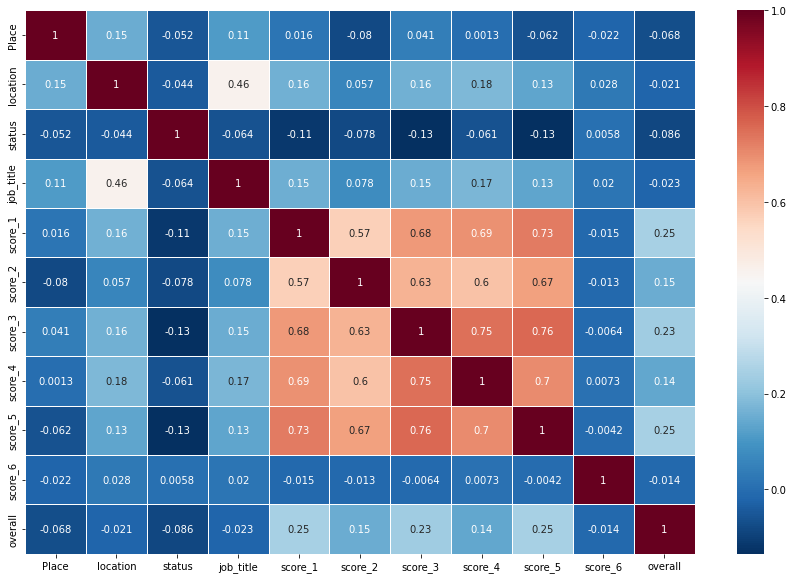

In [11]:
pearsoncorr = dftrain.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,10))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [12]:
#independent and dependent variables
y = dftrain.pop('overall')
X = dftrain
X_test=dftest

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


#the dftest has only X values while dftrain has X and y values so for basic training purposes dftest is now useless

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
features_scaled = X 
X_scaled = scaler.fit_transform(features_scaled)


scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
features_minmax = X
X_minmax = scaler.fit_transform(features_minmax)






############# Unscaled test/train set #############
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=69
)

############ Standard Scaled test/train set ###########
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=69
)

############# MinMax Scaled test/train set ###############
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_minmax, X_test_minmax, _, _ = train_test_split(
    X_minmax, 
    y, 
    test_size=0.2, 
    random_state=69
)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear', C=0.025),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)

,Classifier,Accuracy Score
2,SVC RBF kernel,41.68%
4,RandomForestClassifier,38.46%
5,AdaBoostClassifier,37.56%
1,SVC,36.24%
0,KNeighborsClassifier,35.93%
3,DecisionTreeClassifier,35.29%
7,QuadraticDiscriminantAnalysis,35.13%
6,GaussianNB,34.14%


In [ ]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
score = model.score(X_test_scaled, y_test)

score

In [ ]:
#predicting on RBF kernel
y_test=model.predict(dftest)
print(y_test)

In [ ]:
X_test

In [ ]:
df = pd.DataFrame(y_test)
df.nunique()

In [ ]:
#The accuracy can be further improved when applying NLP on reviews